## 地震灾害评估模型

In [75]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.preprocessing

from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimSun'] # 在其他机器上可能需要修改字体名
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['savefig.dpi'] = 108

### 数据引入

In [40]:
# GDP、震中直线距离、沿岸海浪高度、震级
# x2, x3, x4, x1
miyako_x = np.array([5.19, 186.45, 8.5, 9.0]) # 宫古
iwaki_x = np.array([16.5905, 207.31, 6.51, 9.0]) # 磐城
yokosuka_x = np.array([12.2882, 423.28, 2.06, 9.0]) # 横须贺
sendai_x = np.array([61.7, 176.75, 8.6, 9.0]) # 仙台

matrix_x = np.array([miyako_x, iwaki_x, yokosuka_x, sendai_x])

In [41]:
# 人员伤亡、财产损失
miyako_y = np.array([611, 22,4775])
iwaki_y = np.array([466, 0.1478])
yokosuka_y = np.array([0, 0.92])
sendai_y = np.array([904, 119.9022])

matrix_y = np.array([miyako_y, iwaki_y, yokosuka_y, sendai_y])

## 散点图绘制

In [69]:
def draw_scatter_pic(x, y, description, x_label, y_label):
    """
    绘制散点图的（统一方式）函数
    """
    fig = plt.figure(dpi=600)
    ax1 = fig.add_subplot(111)
    ax1.set_title(description)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax1.scatter(x, y, c = 'r', marker = 'o')
    # plt.legend('x1')
    plt.show()

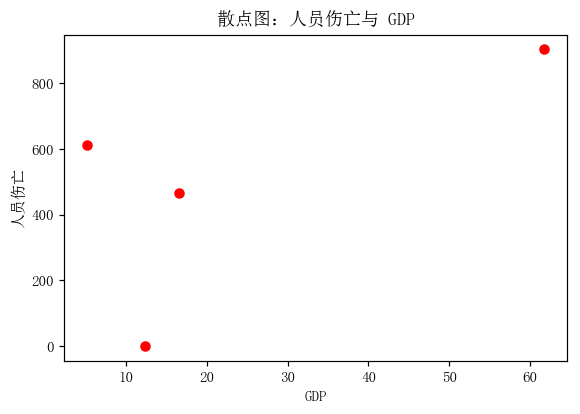

In [70]:
# x_gdp = np.array([miyako_x[0], iwaki_x[0], yokosuka_x[0], sendai_x[0]])
x_gdp = matrix_x[:, 0:1]
y_person = np.array([miyako_y[0], iwaki_y[0], yokosuka_y[0], sendai_y[0]])

draw_scatter_pic(x_gdp, y_person, '散点图：人员伤亡与 GDP', 'GDP', '人员伤亡')

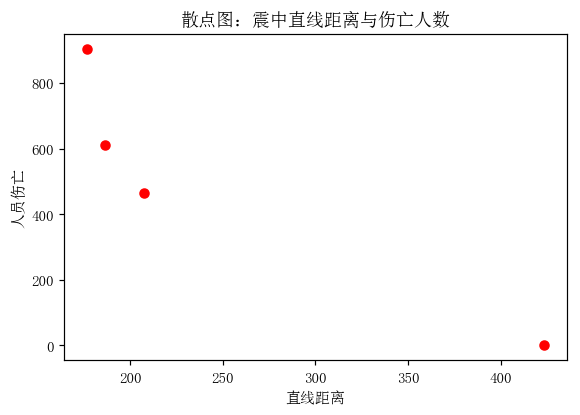

In [71]:
x_distance = np.array([miyako_x[1], iwaki_x[1], yokosuka_x[1], sendai_x[1]])

# fig = plt.figure(dpi=600)
# ax1 = fig.add_subplot(111)
# ax1.set_title('散点图：震中直线距离与伤亡人数')
# plt.xlabel('直线距离')
# plt.ylabel('人员伤亡')
# ax1.scatter(x_distance, y_person, c='r', marker='o')
# plt.show()

draw_scatter_pic(x_distance, y_person, '散点图：震中直线距离与伤亡人数', '直线距离', '人员伤亡')

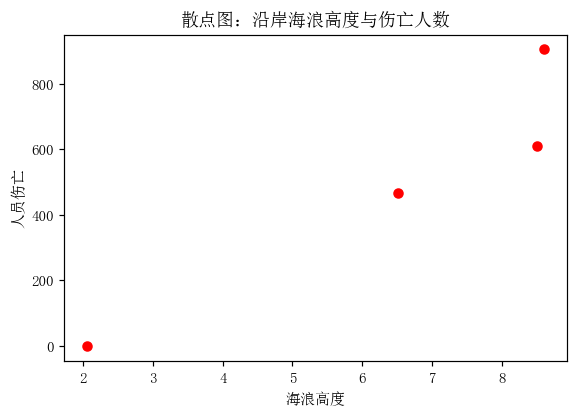

In [67]:
x_tsunami_height = np.array([miyako_x[2], iwaki_x[2], yokosuka_x[2], sendai_x[2]])

fig = plt.figure(dpi=600)
ax1 = fig.add_subplot(111)
ax1.set_title('散点图：沿岸海浪高度与伤亡人数')
plt.xlabel('海浪高度')
plt.ylabel('人员伤亡')
ax1.scatter(x_tsunami_height, y_person, c='r', marker='o')
plt.show()

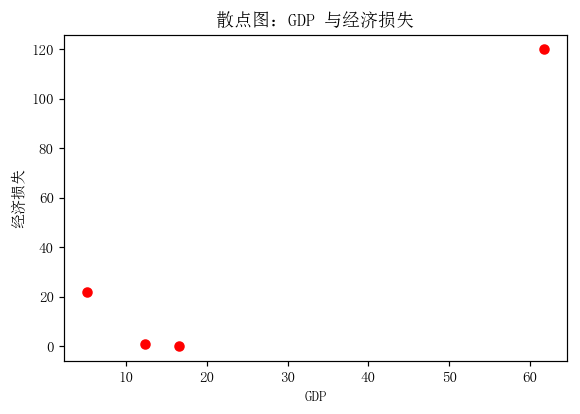

In [72]:
y_loss_economy = y_person = np.array([miyako_y[1], iwaki_y[1], yokosuka_y[1], sendai_y[1]])

draw_scatter_pic(x_gdp, y_loss_economy, '散点图：GDP 与经济损失', 'GDP', '经济损失')

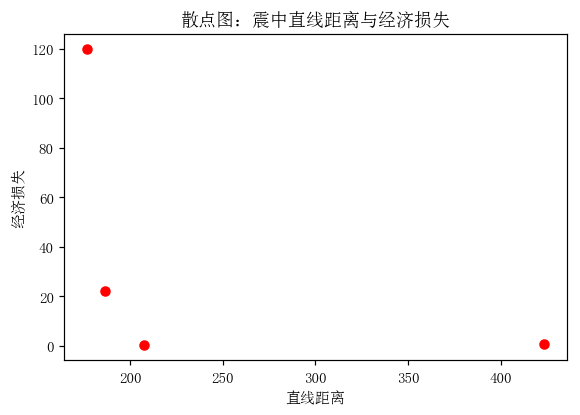

In [73]:
draw_scatter_pic(x_distance, y_loss_economy, '散点图：震中直线距离与经济损失', '直线距离', '经济损失')

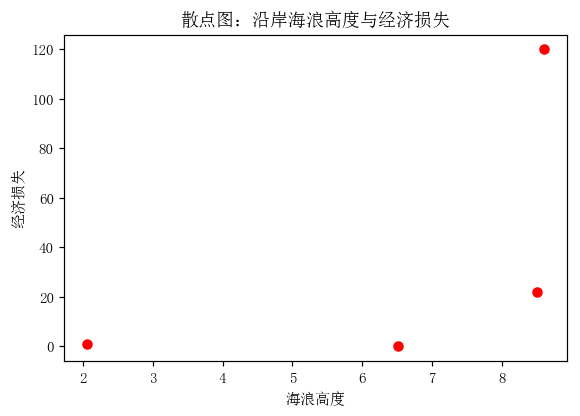

In [74]:
draw_scatter_pic(x_tsunami_height, y_loss_economy, '散点图：沿岸海浪高度与经济损失', '海浪高度', '经济损失')

## 拟合

In [97]:
miyako_x_extended = np.array([1, miyako_x[0], miyako_x[1], miyako_x[2], miyako_x[1] * miyako_x[1], miyako_x[2] * miyako_x[2]])
iwaki_x_extended = np.array([1, iwaki_x[0], iwaki_x[1], iwaki_x[2], iwaki_x[1] * iwaki_x[1], iwaki_x[2] * iwaki_x[2]])
yokosuka_x_extended = np.array([1, yokosuka_x[0], yokosuka_x[1], yokosuka_x[2], yokosuka_x[1] * yokosuka_x[1], yokosuka_x[2] * yokosuka_x[2]])
sendai_x_extended = np.array([1, sendai_x[0], sendai_x[1], sendai_x[2], sendai_x[1] * sendai_x[1], sendai_x[2] * sendai_x[2]])

np_x = np.array([miyako_x_extended, iwaki_x_extended, yokosuka_x_extended, sendai_x_extended])
np_y = np.array([miyako_y[0], iwaki_y[0], yokosuka_y[0], sendai_y[0]])

A = np.matmul(np.linalg.inv(np.matmul(np.transpose(np_x), np_x)), np.matmul(np.transpose(np_x), np_y))

print(A)

[  0.00000000e+00   2.10000000e+01   0.00000000e+00   0.00000000e+00
  -1.95312500e-03   1.00000000e+01]


In [99]:
np_y = np.array([miyako_y[1], iwaki_y[1], yokosuka_y[1], sendai_y[1]])

B = np.matmul(np.linalg.inv(np.matmul(np.transpose(np_x), np_x)), np.matmul(np.transpose(np_x), np_y))

print(B)

[ -6.40000000e+01   3.04687500e+00  -2.50000000e-01  -8.00000000e+00
   6.10351562e-04   1.75000000e+00]


In [98]:
for i in A:
    print(i)

0.0
21.0
0.0
0.0
-0.001953125
10.0


In [100]:
[B[0], B[1], B[2], B[3], B[4]]

[-64.0, 3.046875, -0.25, -8.0, 0.0006103515625]